# Visualize the data 
## 1. Import packages and load data
Load the .csv file that contains the interval-related analysis results from neurokit2. 

In [31]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Paths to folders
results_folder = '/Users/erwin/Documents/ProjectPsychophysiologyData/results/'

# Load the .csv file containing the summary of the results
filename = results_folder + 'ecg_results.csv'
results = pd.read_csv(filename)

print(results)

   ECG_Rate_Mean        HRV_MeanNN         HRV_SDNN       HRV_SDANN1  \
0      63.527690   [[944.7311828]]  [[32.01592164]]   [[14.6882973]]   
1      62.102044  [[966.50526316]]  [[48.22256024]]  [[22.30588058]]   
2      62.968659  [[954.22488038]]  [[89.32988858]]  [[33.53623915]]   
3      75.492160  [[794.61471861]]  [[44.24195874]]   [[6.44176759]]   
4      73.902793  [[812.00442478]]  [[55.36436863]]  [[49.73056139]]   
5      78.459060  [[764.81854839]]  [[66.66153662]]   [[8.05351036]]   
6      76.058357  [[789.00858369]]  [[48.16279787]]  [[25.00642477]]   
7      70.754178  [[848.31627907]]  [[66.45687566]]  [[41.76825989]]   
8      66.631332  [[900.71904762]]  [[63.65030149]]  [[13.23180206]]   

        HRV_SDNNI1 HRV_SDANN2 HRV_SDNNI2 HRV_SDANN5 HRV_SDNNI5  \
0  [[29.10430538]]    [[nan]]    [[nan]]    [[nan]]    [[nan]]   
1  [[41.99462901]]    [[nan]]    [[nan]]    [[nan]]    [[nan]]   
2  [[47.21229047]]    [[nan]]    [[nan]]    [[nan]]    [[nan]]   
3  [[42.8915006

## 2. Select parameters and conditions of interest
First we will look at the mean ECG rate parameter, the number of heartbeats per minute.   
We will aggregate over participants rather than contrasting between them, as commonly done in full experiments. This means that we are not interested in how sub-01 differs from sub-02 in a given condition, but rather in how walk_ground and walk_high conditions differ, for example.    
That is why there is one vector (or list) per condition, which would include more data points than 2 if we had more data sets. 

In [32]:
# Filter rows for each condition
baseline = results[results['Condition'] == 'baseline']
spiderhand = results[results['Condition'] == 'spiderhand']
spidervideo = results[results['Condition'] == 'spidervideo']

# Select the column containing the parameter of interest
bpm_baseline = baseline['ECG_Rate_Mean']
bpm_spiderhand = spiderhand['ECG_Rate_Mean']
bpm_spidervideo = spidervideo['ECG_Rate_Mean']

# Show data 
print(bpm_baseline)
print(bpm_spiderhand)
print(bpm_spidervideo)

0    63.527690
3    75.492160
6    76.058357
Name: ECG_Rate_Mean, dtype: float64
1    62.102044
4    73.902793
7    70.754178
Name: ECG_Rate_Mean, dtype: float64
2    62.968659
5    78.459060
8    66.631332
Name: ECG_Rate_Mean, dtype: float64


## 3. Use divisive baseline to compute base to walk ratio

In [33]:
# Calculate the ratio of spiderhand and spidervideo to baseline
ratio_spiderhand = bpm_spiderhand.values / bpm_baseline.values
ratio_spidervideo = bpm_spidervideo.values / bpm_baseline.values

# Calculate the mean ratio for each condition
avg_ratio_spiderhand = ratio_spiderhand.mean()
avg_ratio_spidervideo = ratio_spidervideo.mean()

average_rate_baseline = bpm_baseline.mean()
average_rate_spiderhand = bpm_spiderhand.mean()
average_rate_spidervideo = bpm_spidervideo.mean()



## 4. Visualize
### 4.1. Visualize all data using basic bar plot
We now visualize the average base to walk ratios computed per condition. First, let us have a look at what it looks like when we use a basic bar plot from matplotlib.   

Note how the **unit** and the **axis labels** are defined. These are essential information to be included in a plot. 

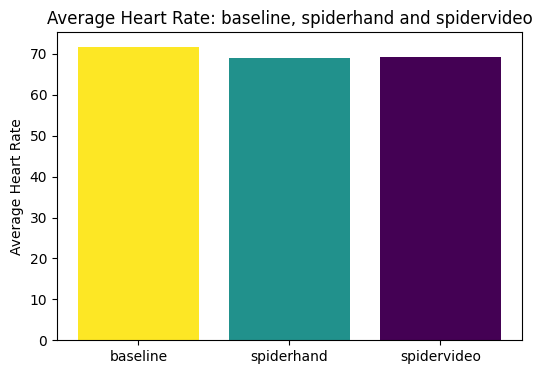

In [34]:
# Data for the bar plot
conditions = ['baseline', 'spiderhand', 'spidervideo']
averages = [average_rate_baseline, average_rate_spiderhand, average_rate_spidervideo]

# Create the bar plot
fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(conditions, averages, color=['#fde725', '#21918c', '#440154'])

# Add labels and title
ax.set_ylabel('Average Heart Rate')
ax.set_title('Average Heart Rate: baseline, spiderhand and spidervideo')

# Display the plot
plt.show()

### 4.2. Better visualization
Pick a better color, display the scale more clearly by making some changes. There are loads of online resources for good visualization tutorials. Choosing the right color is also important for communication of your results. You may want to pick a color palette that is aesthetic as well as user-friendly- for example, see accessible color palette generator : https://venngage.com/tools/accessible-color-palette-generator

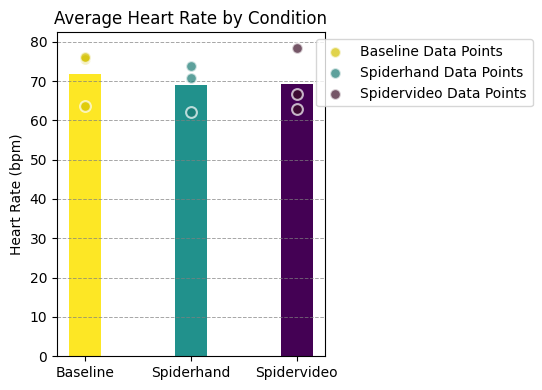

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you already have these heart rate data from earlier:
# bpm_baseline = [list of baseline heart rates]
# bpm_spiderhand = [list of spiderhand heart rates]
# bpm_spidervideo = [list of spidervideo heart rates]

# Calculate the mean heart rates for each condition
avg_bpm_baseline = np.mean(bpm_baseline)
avg_bpm_spiderhand = np.mean(bpm_spiderhand)
avg_bpm_spidervideo = np.mean(bpm_spidervideo)

# Prepare the conditions and average heart rate values for the bar plot
conditions = ['Baseline', 'Spiderhand', 'Spidervideo']
averages = [avg_bpm_baseline, avg_bpm_spiderhand, avg_bpm_spidervideo]

# Prepare data points for the scatter plot (individual heart rate values)
data_points_baseline = bpm_baseline
data_points_spiderhand = bpm_spiderhand
data_points_spidervideo = bpm_spidervideo

# Define the colors
bar_colors = ['#fde725', '#21918c', '#440154']
scatter_colors = ['#d4c100', '#187973', '#3b0f26']

# Create the bar plot
fig, ax = plt.subplots(figsize=(6, 4))

# Create bars for each condition (Baseline, Spiderhand, Spidervideo)
bars = ax.bar(conditions, averages, color=bar_colors, width=0.3)

# Scatter plot for individual data points with distinct colors (slightly darker versions)
# Make the points smaller and add white outline
ax.scatter(
    [0] * len(data_points_baseline), data_points_baseline, 
    color=scatter_colors[0], label='Baseline Data Points', 
    s=60, alpha=0.7, zorder=5, edgecolor='white', linewidth=1.5
)

ax.scatter(
    [1] * len(data_points_spiderhand), data_points_spiderhand, 
    color=scatter_colors[1], label='Spiderhand Data Points', 
    s=60, alpha=0.7, zorder=5, edgecolor='white', linewidth=1.5
)

ax.scatter(
    [2] * len(data_points_spidervideo), data_points_spidervideo, 
    color=scatter_colors[2], label='Spidervideo Data Points', 
    s=60, alpha=0.7, zorder=5, edgecolor='white', linewidth=1.5
)

# Add labels and title
ax.set_ylabel('Heart Rate (bpm)')
ax.set_title('Average Heart Rate by Condition')

# Add a legend in the upper right corner
ax.legend(loc='upper right', bbox_to_anchor=(1.8, 1))

# Add grid lines for clarity
ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, color='gray', alpha=0.7)

# Display the plot and save
figure_filename = results_folder + 'ecg_summary.png'
plt.tight_layout()
plt.subplots_adjust(right=0.55)
plt.savefig(figure_filename, bbox_inches='tight', pad_inches=0.1)
plt.show()
